In [212]:
import pandas as pd
import numpy as np
import copy
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Preprocessing

In [213]:
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [214]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
stops = set(stopwords.words('english'))

In [216]:
train_df = pd.read_csv("train_dataset.csv")
test_df = pd.read_csv("test_dataset.csv")

In [217]:
train_df

,Unnamed: 0,Post_ID,Comment_ID,Comment,Majority_Sentiment
0,63830,b1ifpf,eimdlm6,How about you let people believe what they wan...,Negative
1,74546,r883cg,hn6kho0,Seems to me that you are the naive one. You h...,Negative
2,43112,zot7hf,j0ovzqb,I don't really care what fence you stand or ho...,Negative
3,156883,m7uruh,grkmbba,As if me shutting up matters. That mob gonna j...,Negative
4,25574,guknl9,fssfncv,Didn’t Sun Yat-Sen establish the nation of Chi...,Neutral
...,...,...,...,...,...
104487,75796,rszekc,hqpxj88,[Yeesh](https://i.imgur.com/MzTuPz0.gif). Aigh...,Neutral
104488,63051,b1ifpf,hrt4sj1,Don't think they have them.,Neutral
104489,129544,ow7knn,h7f8g1m,Girls made us so proud and heartiest congratul...,Positive
104490,70964,n6ct9d,gxhnitt,I wonder the same. I guess Evil_Filbert goes b...,Neutral


In [218]:
test_df

,Unnamed: 0,Post_ID,Comment_ID,Comment,Majority_Sentiment
0,4792,p5mjxp,h98tl62,why do we pretend that members of the mujahiid...,Negative
1,157273,mdrrjf,gsb4bzn,Now the russian government cannot pretend anym...,Negative
2,42030,yah7io,itf9fov,"Whether he liked it or not, he's not gonna sud...",Negative
3,23039,fywci6,fn46j5o,"lol, Chinese are the most racist. Just look at...",Negative
4,83438,6f10op,dietjm9,"They could, and are already doing it, but the ...",Negative
...,...,...,...,...,...
26119,119314,n5abcb,gx2cr2z,There are people who believe in some religion ...,Neutral
26120,148451,jjh0mv,gad16qg,Awesome!! Hat did you draw this on?,Positive
26121,81328,38heyu,crvbs4w,>The fifth in our series of articles on Global...,Negative
26122,27317,hosie8,fxxign7,Disagree. I knew Chinese who were complaining ...,Negative


In [219]:
train_sentences = []
train_list=[]

for comment in train_df['Comment']:
    sentences = sent_tokenize(comment)
    train_list.append(sentences)
for data in train_list:
    for sent in data:
        train_sentences.append(sent)
test_sentences = []
test_list=[]
for comment in test_df['Comment']:
    sentences = sent_tokenize(comment)
    test_list.append(sentences)
for data in test_list:
    for sent in data:
        test_sentences.append(sent)

In [220]:
train_sentences

['How about you let people believe what they want to believe in a hard time like this ?',
 'Stop causing more division when the world is already divided.',
 'Seems to me that you are the naive one.',
 'You have not responded with any sources.',
 'I\'m aware of the "sources" you are going to bring, that actually non-muslims and ex-muslims like to bring.',
 'They completely take the verses and the Hadiths out of context.',
 "I don't really care what fence you stand or how many somersaults you want to do over it, I was simply telling OP that he should help the lady burn her stuff somewhere else.",
 "That's it.",
 'As if me shutting up matters.',
 'That mob gonna just sound over my voice.',
 'Didn’t Sun Yat-Sen establish the nation of China, he was instrumental in the overthrow of the Qing Dynasty, and turning it into modern China.',
 'And yeah I’m sure Taiwan, if they had the population size and resources of mainland China, could advance to the point where they could invent what current C

In [221]:
translator = str.maketrans('', '', string.punctuation)
train_sentences_temp=[]
for sent in train_sentences:
    sentence_without_commas = sent
    sentence_without_commas = sentence_without_commas.replace(',', '')
    sentence_without_commas = sentence_without_commas.replace(',', '')
    sentence_without_commas = sentence_without_commas.replace('.', '')
    sentence_without_commas = sentence_without_commas.replace('!', '')
    sentence_without_commas = sentence_without_commas.replace('?', '')
    sentence_without_commas = sentence_without_commas.replace('-', '')
    sentence_without_commas = sentence_without_commas.replace('"', '')
    sentence_without_commas = sentence_without_commas.replace(')', '')
    sentence_without_commas = sentence_without_commas.replace('(', '')
    sentence_without_commas = sentence_without_commas.replace(']', '')
    sentence_without_commas = sentence_without_commas.replace('[', '')
    sentence_without_commas = sentence_without_commas.replace("'", '')
    sentence_without_commas = sentence_without_commas.replace('{', '')
    sentence_without_commas = sentence_without_commas.replace('}', '')
    sentence_without_commas = sentence_without_commas.replace('%', '')
    sentence_without_commas = sentence_without_commas.replace('$', '')
    train_sentences_temp.append(sentence_without_commas)
train_sentences=train_sentences_temp
test_sentences_temp=[]
for sent in test_sentences:
    sentence_without_commas = sent
    sentence_without_commas = sentence_without_commas.replace(',', '')
    sentence_without_commas = sentence_without_commas.replace(',', '')
    sentence_without_commas = sentence_without_commas.replace('.', '')
    sentence_without_commas = sentence_without_commas.replace('!', '')
    sentence_without_commas = sentence_without_commas.replace('?', '')
    sentence_without_commas = sentence_without_commas.replace('-', '')
    sentence_without_commas = sentence_without_commas.replace('"', '')
    sentence_without_commas = sentence_without_commas.replace(')', '')
    sentence_without_commas = sentence_without_commas.replace('(', '')
    sentence_without_commas = sentence_without_commas.replace(']', '')
    sentence_without_commas = sentence_without_commas.replace('[', '')
    sentence_without_commas = sentence_without_commas.replace("'", '')
    sentence_without_commas = sentence_without_commas.replace('{', '')
    sentence_without_commas = sentence_without_commas.replace('}', '')
    sentence_without_commas = sentence_without_commas.replace('%', '')
    sentence_without_commas = sentence_without_commas.replace('$', '')
    test_sentences_temp.append(sentence_without_commas)
test_sentences=test_sentences_temp


In [222]:
train_unigram = []
for sent in train_sentences:
    words = word_tokenize(sent)
    proc_words = []
    for word in words:
        if(word.isalpha()): proc_words.append(lemmatizer.lemmatize(word.lower()))
    if len(proc_words)!=0:
        train_unigram.append(proc_words)
test_unigram = []
for sent in test_sentences:
    words = word_tokenize(sent)
    proc_words = []
    for word in words:
        if(word.isalpha()): proc_words.append(lemmatizer.lemmatize(word.lower()))
    if len(proc_words)!=0:
        test_unigram.append(proc_words)
    
train_bigram = copy.deepcopy(train_unigram)
test_bigram = copy.deepcopy(test_unigram)
train_trigram = copy.deepcopy(train_unigram)
test_trigram = copy.deepcopy(test_unigram)
train_quadgram = copy.deepcopy(train_unigram)
test_quadgram = copy.deepcopy(test_unigram)

In [223]:
train_unigram

[['how',
  'about',
  'you',
  'let',
  'people',
  'believe',
  'what',
  'they',
  'want',
  'to',
  'believe',
  'in',
  'a',
  'hard',
  'time',
  'like',
  'this'],
 ['stop',
  'causing',
  'more',
  'division',
  'when',
  'the',
  'world',
  'is',
  'already',
  'divided'],
 ['seems', 'to', 'me', 'that', 'you', 'are', 'the', 'naive', 'one'],
 ['you', 'have', 'not', 'responded', 'with', 'any', 'source'],
 ['im',
  'aware',
  'of',
  'the',
  'source',
  'you',
  'are',
  'going',
  'to',
  'bring',
  'that',
  'actually',
  'nonmuslims',
  'and',
  'exmuslims',
  'like',
  'to',
  'bring'],
 ['they',
  'completely',
  'take',
  'the',
  'verse',
  'and',
  'the',
  'hadith',
  'out',
  'of',
  'context'],
 ['i',
  'dont',
  'really',
  'care',
  'what',
  'fence',
  'you',
  'stand',
  'or',
  'how',
  'many',
  'somersault',
  'you',
  'want',
  'to',
  'do',
  'over',
  'it',
  'i',
  'wa',
  'simply',
  'telling',
  'op',
  'that',
  'he',
  'should',
  'help',
  'the',
  'lad

In [225]:
for sent in train_bigram:
    sent.append('</s>')
    sent.insert(0, '<s>')
for sent in test_bigram:
    sent.append('</s>')
    sent.insert(0, '<s>')

In [226]:
for sent in train_trigram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
for sent in test_trigram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')

In [227]:
for sent in train_quadgram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
for sent in test_quadgram:
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')
    sent.append('</s>')
    sent.insert(0, '<s>')

In [228]:
test_trigram[0]

['<s>',
 '<s>',
 'why',
 'do',
 'we',
 'pretend',
 'that',
 'member',
 'of',
 'the',
 'mujahiideen',
 'suddenly',
 'burst',
 'into',
 'flame',
 'when',
 'the',
 'taliban',
 'started',
 'rolling',
 'in',
 'sure',
 'you',
 'had',
 'the',
 'formation',
 'of',
 'the',
 'northern',
 'alliance',
 'but',
 'you',
 'also',
 'had',
 'key',
 'leader',
 'like',
 'khalis',
 'who',
 'either',
 'join',
 'them',
 'or',
 'offered',
 'direct',
 'support',
 '</s>',
 '</s>']

In [229]:
start_sent = '<s>'
end_sent = '</s>'

# Ngram Models

### Unigram

In [230]:
class unigram_model():
    
    def __init__(self, sentences):
        self.unigrams = dict()
        self.corpus_size = 0
        for sent in sentences:
            for word in sent:
                if word in self.unigrams:
                    self.unigrams[word]+=1
                else:
                    self.unigrams[word] = 1
                if word!=start_sent and word!=end_sent:
                    self.corpus_size+=1
        self.vocab_size = len(self.unigrams)-2
    
    def probability(self, word):
        if word not in self.unigrams:
            return 0
        else:
            return float(self.unigrams[word])/float(self.corpus_size)
        
    def perplexity(self, sent):
        sum = 0
        n = len(sent)
        for word in sent:
            if word==end_sent or word==start_sent:
                continue
            if self.probability(word)!=0:
                sum += np.log2(self.probability(word))
            else:
                sum+=float('inf')
            result = 2**((-1/float(n)) * float(sum))
        
        return result
    
    def probability_smooth(self, word, k):
        return float(k + float(self.unigrams[word]))/(float(self.corpus_size) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = len(sent)
        for word in sent:
            if word==end_sent or word==start_sent:
                continue
            sum += np.log2(self.probability_smooth(word, k))
        result=0
        result = 2**((-1/float(n)) * float(sum))
        return result

In [231]:
UNIGRAM_MODEL = unigram_model(train_unigram)

n = len(test_unigram)
sum = 0
for sent in test_unigram:
    sum+=UNIGRAM_MODEL.perplexity(sent)
avg_unigram_perplexity = sum/n
avg_unigram_perplexity

7812.986862669283

In [232]:
UNIGRAM_MODEL = unigram_model(train_unigram)

for sent in test_unigram:
    for word in sent:
        if word not in UNIGRAM_MODEL.unigrams:
            UNIGRAM_MODEL.unigrams[word] = 0

UNIGRAM_MODEL.vocab_size = len(UNIGRAM_MODEL.unigrams)-2

def avg_pp_unigram(k):
    n = len(test_unigram)
    sum = 0
    for sent in test_unigram:
        sum+=UNIGRAM_MODEL.perplexity_smooth(sent, k)
    avg_unigram_perplexity_smooth = sum/n
    print(k, avg_unigram_perplexity_smooth)
    return avg_unigram_perplexity_smooth 

20.0 4794.484674104075
23.944444444444443 4699.288204288995
27.88888888888889 4649.445563615093
31.833333333333336 4629.038860305067
35.77777777777778 4628.7447911771815
39.72222222222222 4642.72595216969
43.66666666666667 4667.136658471992
47.611111111111114 4699.339709250697
51.55555555555556 4737.4671187093245
55.5 4780.16002228426


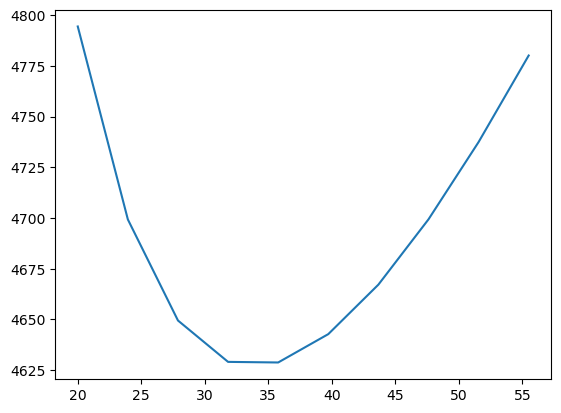

In [254]:
x = np.linspace(20, 55.5, 10)
y = []
for i in x:
    y.append(avg_pp_unigram(i))
    
plt.plot(x, y)

In [255]:
k = x[np.argmin(y)]
print('Optimized perplixity for Unigram for k =', k,'is', avg_pp_unigram(k))

35.77777777777778 4628.7447911771815
Optimized perplixity for Unigram for k = 35.77777777777778 is 4628.7447911771815


### Bigram

In [235]:
class bigram_model(unigram_model):
    
    def __init__(self, sentences):
        unigram_model.__init__(self, sentences)
        self.bigrams = dict()
        self.total_bigrams = 0
        for sent in sentences:
            prev_word = sent[0]
            for word in sent[1:]:
                self.bigrams[(prev_word, word)] = self.bigrams.get((prev_word,word),0) + 1
                self.total_bigrams += 1
                prev_word = word
        self.unique_bigrams = len(self.bigrams)
    
    def probability(self, prev_word, word):
        if (prev_word, word) not in self.bigrams:
            return 0; 
        else:
            return float(self.bigrams[(prev_word, word)])/float(self.unigrams[prev_word])
        
    def perplexity(self, sent):
        sum = 0
        n = 0
        prev_word = sent[0]
        for word in sent[1:]:
            n+=1
            sum += np.log2(self.probability(prev_word, word))
            prev_word = word
        result = 2**((-1/float(n)) * float(sum))
        return result
    
    def probability_smooth(self, prev_word, word, k):
        return float(k + float(self.bigrams[(prev_word, word)]))/(float(self.unigrams[prev_word]) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = 0
        prev_word = sent[0]
        for word in sent[1:]:
            n+=1
            sum += np.log2(self.probability_smooth(prev_word, word, k))
            prev_word = word
        result = 2**((-1/float(n)) * float(sum))
        return result

In [236]:
BIGRAM_MODEL = bigram_model(train_bigram)

n = len(test_bigram)
sum = 0
for sent in test_bigram:
    sum+=BIGRAM_MODEL.perplexity(sent)
avg_bigram_perplexity = sum/n
avg_bigram_perplexity

C:\Users\anish\AppData\Local\Temp\ipykernel_31216\1074084696.py:27: RuntimeWarning: divide by zero encountered in log2
  sum += np.log2(self.probability(prev_word, word))


inf

In [237]:
BIGRAM_MODEL = bigram_model(train_bigram)

for sent in test_bigram:
    prev_word = sent[0]
    for word in sent[1:]:
        if (prev_word, word) not in BIGRAM_MODEL.bigrams:
            BIGRAM_MODEL.bigrams[(prev_word, word)] = 0
            if word not in BIGRAM_MODEL.unigrams:
                BIGRAM_MODEL.unigrams[word] = 0
        prev_word = word

BIGRAM_MODEL.vocab_size = len(BIGRAM_MODEL.unigrams)-2
BIGRAM_MODEL.unique_bigrams = len(BIGRAM_MODEL.bigrams)

def avg_pp_bigram(k):
    n = len(test_bigram)
    sum = 0
    for sent in test_bigram:
        sum+=BIGRAM_MODEL.perplexity_smooth(sent, k)
    avg_bigram_perplexity_smooth = sum/n
    print(k, avg_bigram_perplexity_smooth)
    return avg_bigram_perplexity_smooth 

0.01 4378.504672061047
0.01473684210526316 3945.5258703667637
0.019473684210526317 3697.9437262007705
0.024210526315789474 3538.0762705768266
0.02894736842105263 3427.4639472826443
0.03368421052631579 3347.5618878023865
0.03842105263157895 3288.2158797643524
0.04315789473684211 3243.3549089562293
0.04789473684210527 3209.1065198532747
0.052631578947368425 3182.87466890982
0.05736842105263158 3162.84895698633
0.06210526315789474 3147.7256991547633
0.0668421052631579 3136.540778136902
0.07157894736842106 3128.56502105165
0.07631578947368421 3123.2362735640254
0.08105263157894736 3120.1139055082267
0.08578947368421053 3118.847511836948
0.09052631578947369 3119.154870415792
0.09526315789473684 3120.806096614827
0.1 3123.6120432193898


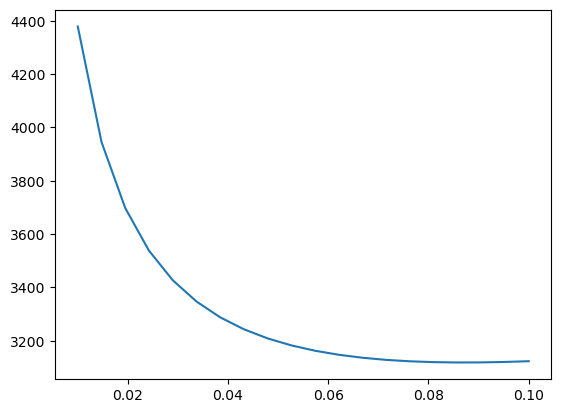

In [251]:
x = np.linspace(0.01, 0.1, 20)
y = []
for i in x:
    y.append(avg_pp_bigram(i))
    
plt.plot(x, y)

In [252]:
k = x[np.argmin(y)]
print('Optimized perplixity for Bigram for k =', k,'is', avg_pp_bigram(k))

0.08578947368421053 3118.847511836948
Optimized perplixity for Bigram for k = 0.08578947368421053 is 3118.847511836948


### Trigram

In [240]:
class trigram_model(bigram_model):
    
    def __init__(self, sentences):
        bigram_model.__init__(self, sentences)
        self.trigrams = dict()
        self.total_trigrams = 0
        for sent in sentences:
            for i in range(len(sent)-2):
                if (sent[i], sent[i+1], sent[i+2]) not in self.trigrams:
                    self.trigrams[(sent[i], sent[i+1], sent[i+2])] = 1
                else:
                    self.trigrams[(sent[i], sent[i+1], sent[i+2])] += 1
                self.total_trigrams += 1
        self.unique_trigrams = len(self.trigrams)
    
    def probability(self, pp_word, prev_word, word):
        if (pp_word, prev_word, word) not in self.trigrams:
            return 0; 
        else:
            return float(self.trigrams[(pp_word, prev_word, word)])/float(self.bigrams[(pp_word, prev_word)])
        
    def perplexity(self, sent):
        sum = 0
        n = 0
        for i in range(len(sent)-2):
            n+=1
            sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2]))
        result = 2**((-1/float(n)) * float(sum))
        return result
    
    def probability_smooth(self, pp_word, prev_word, word, k):
        return float(k + float(self.trigrams[(pp_word, prev_word, word)]))/(float(self.bigrams[(pp_word, prev_word)]) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = 0
        for i in range(len(sent)-2):
            n+=1
            sum += np.log2(self.probability_smooth(sent[i], sent[i+1], sent[i+2], k))
        result = 2**((-1/float(n)) * float(sum))
        return result

In [241]:
TRIGRAM_MODEL = trigram_model(train_trigram)

n = len(test_trigram)
sum = 0
for sent in test_trigram:
    sum+=TRIGRAM_MODEL.perplexity(sent)
avg_trigram_perplexity = sum/n
avg_trigram_perplexity

C:\Users\anish\AppData\Local\Temp\ipykernel_31216\636619404.py:27: RuntimeWarning: divide by zero encountered in log2
  sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2]))


inf

In [242]:
TRIGRAM_MODEL = trigram_model(train_trigram)

for sent in test_trigram:
    prev_word = sent[0]
    for word in sent[1:]:
        if (prev_word, word) not in TRIGRAM_MODEL.bigrams:
            TRIGRAM_MODEL.bigrams[(prev_word, word)] = 0
            if word not in TRIGRAM_MODEL.unigrams:
                TRIGRAM_MODEL.unigrams[word] = 0
        prev_word = word
    for i in range(len(sent)-2):
        if(sent[i], sent[i+1], sent[i+2]) not in TRIGRAM_MODEL.trigrams:
            TRIGRAM_MODEL.trigrams[(sent[i], sent[i+1], sent[i+2])] = 0

TRIGRAM_MODEL.vocab_size = len(TRIGRAM_MODEL.unigrams)-2
TRIGRAM_MODEL.unique_bigrams = len(TRIGRAM_MODEL.bigrams)
TRIGRAM_MODEL.unique_trigrams = len(TRIGRAM_MODEL.trigrams)

def avg_pp_trigram(k):
    n = len(test_trigram)
    sum = 0
    for sent in test_trigram:
        sum+=TRIGRAM_MODEL.perplexity_smooth(sent, k)
    avg_trigram_perplexity_smooth = sum/n
    print(k, avg_trigram_perplexity_smooth)
    return avg_trigram_perplexity_smooth 

0.001 6426.253498121456
0.002 5997.074748922501
0.003 5852.648239172785
0.004 5796.075416742692
0.005 5778.30779188385
0.006 5780.857237591399
0.007 5795.147334292826
0.008 5816.65802559945
0.009000000000000001 5842.791066118778
0.01 5871.95620253352


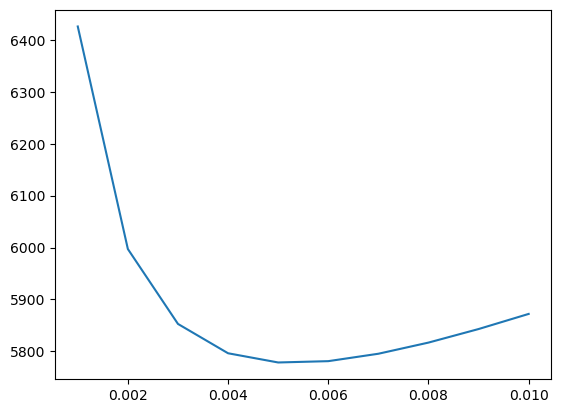

In [243]:
x = np.linspace(0.001, 0.01, 10)
y = []
for i in x:
    y.append(avg_pp_trigram(i))
    
plt.plot(x, y)

In [244]:
k = x[np.argmin(y)]
print('Optimized perplixity for Trigram for k =', k,'is', avg_pp_trigram(k))

0.005 5778.30779188385
Optimized perplixity for Trigram for k = 0.005 is 5778.30779188385


### Quadgram

In [245]:
class quadgram_model(trigram_model):
    
    def __init__(self, sentences):
        trigram_model.__init__(self, sentences)
        self.quadgrams = dict()
        self.total_quadgrams = 0
        for sent in sentences:
            for i in range(len(sent)-3):
                if (sent[i], sent[i+1], sent[i+2], sent[i+3]) not in self.quadgrams:
                    self.quadgrams[(sent[i], sent[i+1], sent[i+2], sent[i+3])] = 1
                else:
                    self.quadgrams[(sent[i], sent[i+1], sent[i+2], sent[i+3])] += 1
                self.total_quadgrams += 1
        self.unique_quadgrams = len(self.quadgrams)
    
    def probability(self, prev_p_word, pp_word, prev_word, word):
        if (prev_p_word, pp_word, prev_word, word) not in self.quadgrams:
            return 0; 
        else:
            return float(self.quadgrams[(prev_p_word, pp_word, prev_word, word)])/float(self.trigrams[(prev_p_word, pp_word, prev_word)])
        
    def perplexity(self, sent):
        sum = 0
        n = 0
        for i in range(len(sent)-3):
            n+=1
            sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2], sent[i+3]))
        result = 2**((-1/float(n)) * float(sum))
        return result
    
    def probability_smooth(self, prev_p_word, pp_word, prev_word, word, k):
        return float(k + float(self.quadgrams[(prev_p_word, pp_word, prev_word, word)]))/(float(self.trigrams[(prev_p_word, pp_word, prev_word)]) + k*self.vocab_size)
        
    def perplexity_smooth(self, sent, k):
        sum = 0
        n = 0
        for i in range(len(sent)-3):
            n+=1
            sum += np.log2(self.probability_smooth(sent[i], sent[i+1], sent[i+2], sent[i+3], k))
        result = 2**((-1/float(n)) * float(sum))
        return result

In [246]:
QUADGRAM_MODEL = quadgram_model(train_quadgram)

n = len(test_quadgram)
sum = 0
for sent in test_quadgram:
    sum+=QUADGRAM_MODEL.perplexity(sent)
avg_quadgram_perplexity = sum/n
avg_quadgram_perplexity

C:\Users\anish\AppData\Local\Temp\ipykernel_31216\1640041841.py:27: RuntimeWarning: divide by zero encountered in log2
  sum += np.log2(self.probability(sent[i], sent[i+1], sent[i+2], sent[i+3]))


inf

In [247]:
QUADGRAM_MODEL = quadgram_model(train_quadgram)

for sent in test_quadgram:
    prev_word = sent[0]
    for word in sent[1:]:
        if (prev_word, word) not in QUADGRAM_MODEL.bigrams:
            QUADGRAM_MODEL.bigrams[(prev_word, word)] = 0
            if word not in QUADGRAM_MODEL.unigrams:
                QUADGRAM_MODEL.unigrams[word] = 0
        prev_word = word
    for i in range(len(sent)-2):
        if(sent[i], sent[i+1], sent[i+2]) not in QUADGRAM_MODEL.trigrams:
            QUADGRAM_MODEL.trigrams[(sent[i], sent[i+1], sent[i+2])] = 0
    for i in range(len(sent)-3):
        if(sent[i], sent[i+1], sent[i+2], sent[i+3]) not in QUADGRAM_MODEL.quadgrams:
            QUADGRAM_MODEL.quadgrams[(sent[i], sent[i+1], sent[i+2], sent[i+3])] = 0

QUADGRAM_MODEL.vocab_size = len(QUADGRAM_MODEL.unigrams)-2
QUADGRAM_MODEL.unique_bigrams = len(QUADGRAM_MODEL.bigrams)
QUADGRAM_MODEL.unique_trigrams = len(QUADGRAM_MODEL.trigrams)
QUADGRAM_MODEL.unique_quadgrams = len(QUADGRAM_MODEL.quadgrams)

def avg_pp_quadgram(k):
    n = len(test_quadgram)
    sum = 0
    for sent in test_quadgram:
        sum+=QUADGRAM_MODEL.perplexity_smooth(sent, k)
    avg_quadgram_perplexity_smooth = sum/n
    print(k, avg_quadgram_perplexity_smooth)
    return avg_quadgram_perplexity_smooth 

0.0005 9976.70813611611
0.0006071428571428572 9931.66255462407
0.0007142857142857143 9906.44867620804
0.0008214285714285715 9893.728421204452
0.0009285714285714286 9889.31782746032
0.0010357142857142856 9890.656099003014
0.001142857142857143 9896.090009660355
0.00125 9904.506937523915
0.0013571428571428571 9915.132765472254
0.0014642857142857144 9927.414079737135
0.0015714285714285715 9940.946252092102
0.0016785714285714286 9955.427810716252
0.0017857142857142859 9970.630532699875
0.001892857142857143 9986.379287269438
0.002 10002.538118834957


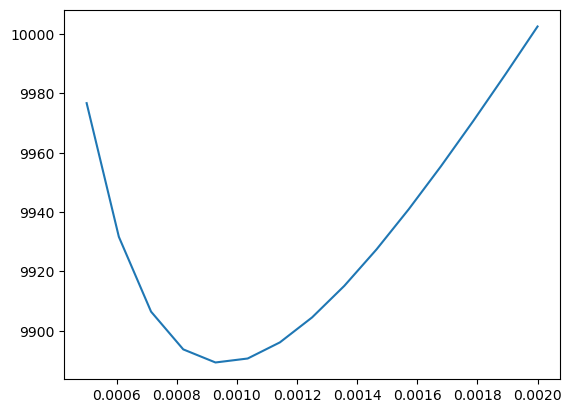

In [256]:
x = np.linspace(0.0005,0.0020, 15)
y = []
for i in x:
    y.append(avg_pp_quadgram(i))
    
plt.plot(x, y)

In [249]:
k = x[np.argmin(y)]
print('Optimized perplixity for Quadgram for k =', k,'is', avg_pp_quadgram(k))

0.001 9889.687005193518
Optimized perplixity for Quadgram for k = 0.001 is 9889.687005193518


# BONUS